In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('trainh.csv')

In [3]:
print(str(len(df.index)))

878049


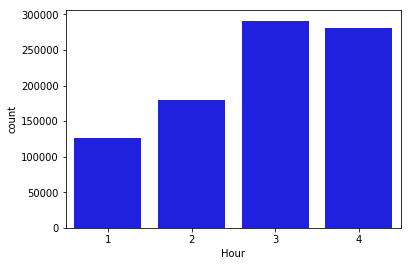

In [4]:
sns.countplot(x="Hour", data=df, color="blue")

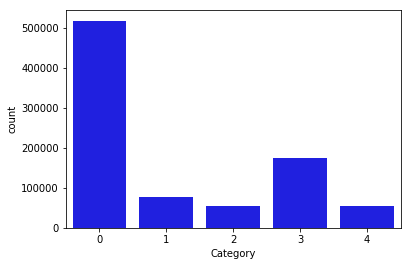

In [5]:
sns.countplot(x="Category", data=df, color="blue")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 10 columns):
Dates         878049 non-null object
Category      878049 non-null int64
DayOfWeek     878049 non-null int64
PdDistrict    878049 non-null int64
X             878049 non-null float64
Y             878049 non-null float64
Hour          878049 non-null int64
Day           878049 non-null int64
Month         878049 non-null int64
Year          878049 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 67.0+ MB


In [7]:
df.isnull().sum()

Dates         0
Category      0
DayOfWeek     0
PdDistrict    0
X             0
Y             0
Hour          0
Day           0
Month         0
Year          0
dtype: int64

In [8]:
df.head(5)

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Hour,Day,Month,Year
0,5/13/2015 23:53,0,4,5,-122.425892,37.774599,4,13,5,2015
1,5/13/2015 23:53,0,4,5,-122.425892,37.774599,4,13,5,2015
2,5/13/2015 23:33,0,4,5,-122.424363,37.800414,4,13,5,2015
3,5/13/2015 23:30,3,4,5,-122.426995,37.800873,4,13,5,2015
4,5/13/2015 23:30,3,4,6,-122.438738,37.771541,4,13,5,2015


In [9]:
df.drop(['Dates'], axis=1, inplace=True)

In [10]:
df.head(5)

,Category,DayOfWeek,PdDistrict,X,Y,Hour,Day,Month,Year
0,0,4,5,-122.425892,37.774599,4,13,5,2015
1,0,4,5,-122.425892,37.774599,4,13,5,2015
2,0,4,5,-122.424363,37.800414,4,13,5,2015
3,3,4,5,-122.426995,37.800873,4,13,5,2015
4,3,4,6,-122.438738,37.771541,4,13,5,2015


In [11]:
x = df.drop("Category", axis=1)
y = df["Category"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()

In [16]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
logmodel.score(x_train, y_train)

0.5909712121360029

In [18]:
logmodel.score(x_test, y_test)

0.5895260330656948

In [19]:
predictions = logmodel.predict(x_test)

In [19]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.59      1.00      0.74    155290
          1       0.00      0.00      0.00     23212
          2       0.00      0.00      0.00     16215
          3       0.00      0.00      0.00     52625
          4       0.00      0.00      0.00     16073

avg / total       0.35      0.59      0.44    263415



/home/shafi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test, predictions))

[[155290      0      0      0      0]
 [ 23212      0      0      0      0]
 [ 16215      0      0      0      0]
 [ 52625      0      0      0      0]
 [ 16073      0      0      0      0]]


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, predictions)

0.5895260330656948

In [23]:
from sklearn.metrics import log_loss

In [27]:
logmodel_probs = logmodel.predict_proba(x_test)
score = log_loss(y_test, logmodel_probs)
print(score)

1.168608799340621


In [28]:
from sklearn.metrics import r2_score

In [29]:
r2score = r2_score(y_test, predictions)
print(r2score)

-0.5571462580519269


## Neural Network

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
nn = MLPClassifier()

In [32]:
nn.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
nn.score(x_train, y_train)

0.5909712121360029

In [34]:
nn.score(x_test, y_test)

0.5895260330656948

In [35]:
pred = nn.predict(x_test)

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.59      1.00      0.74    155290
          1       0.00      0.00      0.00     23212
          2       0.00      0.00      0.00     16215
          3       0.00      0.00      0.00     52625
          4       0.00      0.00      0.00     16073

avg / total       0.35      0.59      0.44    263415



/home/shafi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print(confusion_matrix(y_test, pred))

[[155290      0      0      0      0]
 [ 23212      0      0      0      0]
 [ 16215      0      0      0      0]
 [ 52625      0      0      0      0]
 [ 16073      0      0      0      0]]


## Decision Tree

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

clf = clf.fit(x_train, y_train)

In [15]:
print(clf.score(x_train, y_train))

0.9283752607242685


In [16]:
print(clf.score(x_test, y_test))

0.5152781732247594


In [20]:
dec_prediction = clf.predict(x_test)

print(classification_report(y_test, dec_prediction))

             precision    recall  f1-score   support

          0       0.64      0.67      0.65    155290
          1       0.18      0.17      0.18     23212
          2       0.31      0.30      0.30     16215
          3       0.37      0.32      0.34     52625
          4       0.36      0.39      0.38     16073

avg / total       0.51      0.52      0.51    263415



In [21]:
print(confusion_matrix(y_test, dec_prediction))

[[103709  13484   8344  22858   6895]
 [ 14970   4015    728   2646    853]
 [  9903    623   4788    722    179]
 [ 28166   3283   1203  16920   3053]
 [  6300    795    234   2444   6300]]


In [24]:
clf_probs = clf.predict_proba(x_test)
score = log_loss(y_test, clf_probs)
print(score)

15.58573757439168


## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [53]:
print(knn.score(x_train, y_train))

0.6003914524741554


In [54]:
print(knn.score(x_test, y_test))

0.5821612284797753


In [55]:
knn_prediction = knn.predict(x_test)

print(classification_report(y_test, knn_prediction))

             precision    recall  f1-score   support

          0       0.60      0.95      0.73    155290
          1       0.14      0.00      0.00     23212
          2       0.35      0.04      0.07     16215
          3       0.36      0.08      0.13     52625
          4       0.29      0.02      0.03     16073

avg / total       0.48      0.58      0.47    263415



In [56]:
print(confusion_matrix(y_test, knn_prediction))

[[148137     89    907   5741    416]
 [ 22289     21    121    736     45]
 [ 15161      4    671    358     21]
 [ 48029     28    175   4267    126]
 [ 15144     11     17    647    254]]


In [57]:
knn_probs = knn.predict_proba(x_test)
score = log_loss(y_test, knn_probs)
print(score)

2.4113817507225335


## GNB

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [47]:
gnb.score(x_train, y_train)

0.27752613750622324

In [48]:
gnb.score(x_test, y_test)

0.2766547083499421

In [49]:
gnb_prediction = gnb.predict(x_test)

print(classification_report(y_test, gnb_prediction))

             precision    recall  f1-score   support

          0       0.62      0.39      0.47    155290
          1       0.00      0.00      0.00     23212
          2       0.08      0.80      0.14     16215
          3       0.00      0.00      0.00     52625
          4       0.12      0.00      0.00     16073

avg / total       0.38      0.28      0.29    263415



/home/shafi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
print(confusion_matrix(y_test, gnb_prediction))

[[59835     0 95438     0    17]
 [ 9235     0 13975     0     2]
 [ 3178     0 13037     0     0]
 [16748     0 35874     0     3]
 [ 7709     0  8361     0     3]]


In [51]:
gnb_probs = gnb.predict_proba(x_test)
score = log_loss(y_test, gnb_probs)
print(score)

1.6498972469731723
